# Keypoint Detection

In [1]:
import cv2
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/home/tkd_010/ImageProcessing/study/image_registeration/before.png'

img = cv2.imread(path, 0)

In [3]:
blob_log = skimage.feature.blob_log(img, max_sigma=30, num_sigma=10, threshold=.1)   # 느리지만, 제일 좋은 성능
blob_dog = skimage.feature.blob_dog(img, max_sigma=30, sigma_ratio=2, threshold=.1)
blob_doh = skimage.feature.blob_doh(img, max_sigma=30, num_sigma=2, threshold=.1)

blob_log.shape,  blob_dog.shape, blob_doh.shape

((32, 3), (19, 3), (0, 3))

In [73]:
img_l =img.copy()

for blob in blob_log:
    y, x, r = blob
    x, y, r = int(x), int(y), int(r)
    
    cv2.circle(img_l, (x, y), radius=8, color=(0,0,0), thickness=1)


img_d =img.copy()

for blob in blob_dog:
    y, x, r = blob
    x, y, r = int(x), int(y), int(r)
    
    cv2.circle(img_d, (x, y), radius=8, color=(0,0,0), thickness=1)

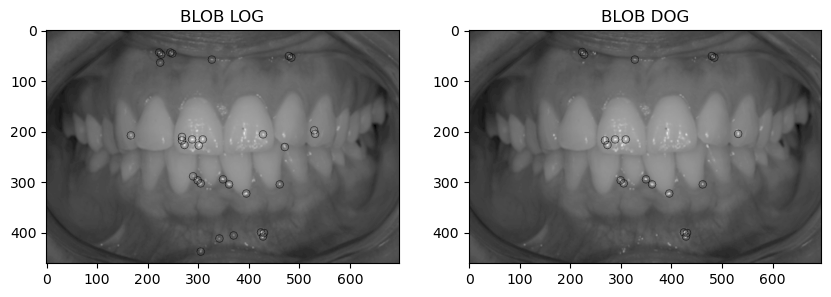

In [75]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img_l, cmap='gray')
plt.title("BLOB LOG")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_d, cmap='gray')
plt.title("BLOB DOG")
plt.axis("off")

plt.show()

Blob LOG >  Blob DOG  >  Blob DOH  순으로 keypoints를 가장 잘 찾아냄
 - BLOB DOH는 keypoint를 아예 검출하지 못했음

# Hamming distance 
- coding에서의 hamming distance 정의: 두 코드워드 사이에서 서로 다른 비트 위치의 수
- "The Hamming distance between two codewords is simply the number of bit positions in which they differ."

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

* hamming distance function 구현

In [32]:
## 입력이 숫자일 때
def hammingDist(inp1 , inp2):
    return bin(inp1^inp2).count('1')

In [36]:
print(bin(4), bin(7), bin(4^7))
print(f'hammingDist: {hammingDist(4, 7)}')

0b100 0b111 0b11
hammingDist: 2


* Average Hamming Matching 구현

(461, 697)


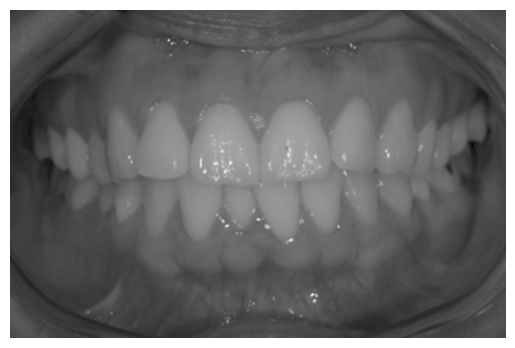

--------------------------------------------------------------------------------
[[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 

In [48]:
import cv2
import numpy as np

path = '/home/tkd_010/ImageProcessing/study/image_registeration/before.png'
img = cv2.imread(path, 0)
img_ori = img.copy()

print(img.shape)
img = cv2.resize(img, (40,20))

avg = np.average(img)

hashing_img = (avg > img) * 1

plt.imshow(img_ori, cmap='gray')
plt.axis("off")
plt.show()
print("-"*80)

np.set_printoptions(threshold=3000, linewidth=np.inf)
print(hashing_img)